**NAMA : NURSALAM**

**submission Dicoding**

In [2]:
#import library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-18 08:21:56--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.99MB/s    in 62s     

2021-07-18 08:23:00 (4.94 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#ekstrak dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Pemberhentian training dengan callbac jika akurasi melebihi 96%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi di atas 96%, hentikan training!")
      self.model.stop_training = True

callbacks = myCallback()

In [5]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
sciss_dir = os.path.join(base_dir, 'scissors')

In [12]:
os.listdir(train_dir)
os.listdir(validation_dir)

['paper', 'scissors', 'rock']

In [13]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_sciss = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_sciss = os.path.join(validation_dir, 'scissors')

In [16]:
# memecah direktori menjadi data train dan data validasi, akurasi 40%
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_sciss_dir, val_sciss_dir = train_test_split(os.listdir(sciss_dir), test_size = 0.40)

In [17]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir,file), os.path.join(train_rock,file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_sciss_dir:
  shutil.copy(os.path.join(sciss_dir,file), os.path.join(train_sciss,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir,file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_sciss_dir:
  shutil.copy(os.path.join(sciss_dir,file), os.path.join(val_sciss,file))

In [18]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size= 32,
    class_mode='categorical' # klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

#model sequantial
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch =len(train_generator), # bisa diganti 40
    epochs = 20,
    validation_data = validation_generator,
    validation_steps =len(validation_generator), # bisa diganti 26
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 74s - loss: 1.1294 - accuracy: 0.4291 - val_loss: 1.0500 - val_accuracy: 0.5411
Epoch 2/20
41/41 - 73s - loss: 0.7534 - accuracy: 0.6982 - val_loss: 0.5704 - val_accuracy: 0.7740
Epoch 3/20
41/41 - 72s - loss: 0.5227 - accuracy: 0.8018 - val_loss: 0.4180 - val_accuracy: 0.8733
Epoch 4/20
41/41 - 72s - loss: 0.3226 - accuracy: 0.8857 - val_loss: 0.2037 - val_accuracy: 0.9258
Epoch 5/20
41/41 - 72s - loss: 0.2399 - accuracy: 0.9085 - val_loss: 0.1984 - val_accuracy: 0.9269
Epoch 6/20
41/41 - 72s - loss: 0.2064 - accuracy: 0.9261 - val_loss: 0.1816 - val_accuracy: 0.9338
Epoch 7/20
41/41 - 72s - loss: 0.1941 - accuracy: 0.9360 - val_loss: 0.1185 - val_accuracy: 0.9578
Epoch 8/20
41/41 - 72s - loss: 0.1418 - accuracy: 0.9497 - val_loss: 0.1234 - val_accuracy: 0.9532
Epoch 9/20
41/41 - 72s - loss: 0.1227 - accuracy: 0.9604 - val_loss: 0.1123 - val_accuracy: 0.9543

Akurasi di atas 96%, hentikan training!


Saving rock.jpg to rock.jpg
rock.jpg
rock


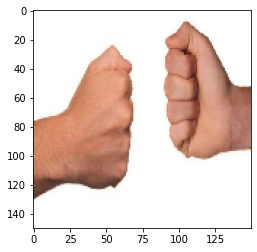

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('rock')
  elif classes[0,1]!=0:
    print('paper')
  else:
    print('scissors')